## ES 335 - Machine Learning
### Prerequsite test


In [1]:
import time
import numpy as np
import jax
import jax.numpy as jnp
import math
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd

#### 1) How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

Let us consider 2 matrices $A$ and $B$, where $A$ is a matrix of shape $(n, k)$ and $B$ is a matrix with shape $(k, m)$. The result matrix $C$ will be of shape $(n, m)$.
Each row of $A$ and each column of $B$ will be evaluated in a SUM OF PRODUCTS fashion to result in matrix $C$, for example,

$$ a_{1,1} \times b_{1,1} +  a_{1,2} \times b_{2,1} + a_{1,3} \times b_{3,1} + .... + a_{1,k} \times b_{k,1} = c_{1,1}$$
more generally,
$$ a_{i,1} \times b_{1,j} +  a_{i,2} \times b_{2,j} + a_{i,3} \times b_{3,j} + .... + a_{i,k} \times b_{k,j} = c_{i,j} $$
where $a, b, c$ are elements of matrices $A, B$ and $C$ respectively with the notation $a_{i,j}$ denoting element at row $i$ and column $j$

Such operations will be performed for each element $c$ of matrix $C$

Each such element $c$'s calculation involves $k$ multiplications and $k-1$ additions

Therefore, the whole multiplication process involves $n\times m\times k$ multiplications and $n\times m\times(k-1)$ additions, since $C$ has $n\times m$ elements.

#### 2) Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?


In [ ]:
# matrix A of shape (3x3)[nxk] and B of shape (3,2)[kxm], which will result in C of shape (3x2)[nxm]

# multiplying using list of lists, vanilla python

A = [[1,2,3], [4,5,6], [7,8,9]]
B = [[1,2], [3,4], [5,6]]
C = []

start_time = time.time()

for i in range(len(A)):            # n times
    row = []
    for j in range(len(B[0])):     # m times
        elem = 0
        for k in range(len(B)):    # k times
            prod = A[i][k]* B[k][j]
            elem += prod
        row.append(elem)
    C.append(row)       # -> n rows

end_time = time.time()
runtime = end_time - start_time

print("For vanilla implementation =",runtime * 1000, "seconds")

# multiplying using numpy arrays and numpy dot function
A_np = np.array(A)
B_np = np.array(B)

start_time = time.time()

C_np = np.dot(A_np, B_np)

end_time = time.time()
runtime = end_time - start_time

print("For numpy implementation =",runtime * 1000, "seconds")


For vanilla implementation = 0.1399517059326172 seconds
For numpy implementation = 0.08606910705566406 seconds


The numpy implementation is faster because numpy is itself written in C. Numpy arrays are more static and homogeneous in nature like other statically typed languages (eg. C or C++) and the elements of a numpy array are stored next to each other in the memory; unlike python lists which are more dynamic in nature, being able to accommodate data of any data type and allocated memory dynamically. Numpy also takes advantage of parallelism to speed up the execution.

#### 3) Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?


The time complexity of finding the median of the array using the first method will be:

If $n$ = odd, we need to make $(n+1)/2$ passes over the array. And, each pass has a time complexity of $O(n)$. Therefore, total time complexity is:
$$n/2 \times O(n) = O(n^2)$$

If $n$ = even, we need to make $(n/2) + 1$ passes over the array. And, each pass has a time complexity of $O(n)$. Therefore, total time complexity is:
$$n/2 \times O(n) = O(n^2)$$

So, in either case, time complexity is $O(n^2)$.

In [ ]:
# first method
def find_kth_largest(arr, k):
    n = len(arr)
    largest_elements = []

    for _ in range(k):
        max_val = float('-inf')
        max_index = -1
        for i in range(n):
            if arr[i] > max_val and (i not in largest_elements):
                max_val = arr[i]
                max_index = i
        largest_elements.append(max_index)

    return arr[largest_elements[-1]]

def find_median(arr):
    n = len(arr)
    if n % 2 == 1:
        median_pos = n // 2 + 1  # for odd length, find the middle element
        median = find_kth_largest(arr, median_pos)
    else:
        median_pos1 = n // 2  # for even length, find the two middle elements
        median_pos2 = median_pos1 + 1
        median1 = find_kth_largest(arr, median_pos1)
        median2 = find_kth_largest(arr, median_pos2)
        median = (median1 + median2) / 2

    return median

arr = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]

start_time = time.time()

median = find_median(arr)

end_time = time.time()
runtime = end_time - start_time

print("Median:", median)
print("runtime:", runtime)

Median: 4
runtime: 8.320808410644531e-05


A better method can be to sort the given array first using Quick Sort algorithmm, and then access the required elements (depending on if n is even or odd) to get the median of the array.

Time complexity would be the time complexity of Quick Sort: $nlog(n)$

In [ ]:
# a better method using quick sort
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr) // 2]
        left = [x for x in arr if x < pivot]
        middle = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]
        return quick_sort(left) + middle + quick_sort(right)

def find_median(arr):
    n = len(arr)
    sorted_arr = quick_sort(arr)
    if n % 2 == 1:
        median_pos = n // 2 + 1  # for odd length, get the middle element
        median = sorted_arr[median_pos - 1]
    else:
        median_pos1 = n // 2  # for even length, find the two middle elements
        median_pos2 = median_pos1 + 1
        median1 = sorted_arr[median_pos1 - 1]
        median2 = sorted_arr[median_pos2 - 1]
        median = (median1 + median2) / 2

    return median

arr = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]

start_time = time.time()

median = find_median(arr)

end_time = time.time()
runtime = end_time - start_time

print("Median:", median)
print("runtime:", runtime)


Median: 4
runtime: 7.843971252441406e-05


Now, using numpy.median routine to find the median of the same array:

In [ ]:
start_time = time.time()

median = np.median(np.array(arr))

end_time = time.time()
runtime = end_time - start_time

print("Median:", median)
print("runtime:", runtime)

Median: 4.0
runtime: 0.0004837512969970703


The numpy method consistently takes more execution time for the selected example, but it will be faster as the size of the array grows.

#### 4) What is the gradient of the following function with respect to x and y?
$$x^2 y + y^3 sin(x)$$


Gradient of function F of $x$ and $y$ is defined as:

$$\nabla F(\mathbf{x}) = \left[ \frac{\partial F}{\partial x}, \frac{\partial F}{\partial y} \right]
$$

In more general words, the gradient is a vector of the form:

$$
\nabla f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2} \\
\vdots \\
\frac{\partial f}{\partial x_n}
\end{bmatrix}
$$

Therefore, for the given function, the gradient will be:
$$\nabla F(x,y) =
\begin{bmatrix}
\frac{\partial (x^2 y + y^3 sin(x))}{\partial x} \\
\frac{\partial (x^2 y + y^3 sin(x))}{\partial y} \\
\end{bmatrix} $$
$$ ⇒ \nabla F(x,y) =
\begin{bmatrix}
\ 2xy + y^3 cos(x) \\
\ x^2 + 3y^2 sin(x) \\
\end{bmatrix}$$

#### 5) Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y



In [ ]:
def f(x, y):
  return (x**2 * y) + y**3 * jnp.sin(x)

def analytical_df_dx(x, y):
  return 2*x*y + y**3 * math.cos(x)

def analytical_df_dy(x, y):
  return x**2 + 3*y**2 * math.sin(x)

def analytical_grad(x, y):
  return (analytical_df_dx(x, y), analytical_df_dy(x, y))

def jax_grad(x, y):
  jax_df_dx = jax.grad(f, argnums=0) #for differentiating wrt x
  jax_df_dy = jax.grad(f, argnums=1) #for differentiating wrt y
  return float(jax_df_dx(x, y)), float(jax_df_dy(x, y))

x = 1.0
y = 2.0
print(jax_grad(x, y))
print(analytical_grad(x, y))
x = 5.0
y = 4.0
print(jax_grad(x, y))
print(analytical_grad(x, y))
x = 10.0
y = 5.0
print(jax_grad(x, y))
print(analytical_grad(x, y))
# print(analytical_grad(1.0,2.0), jax_grad(1.0, 2.0))

(8.322418212890625, 11.097651481628418)
(8.322418446945118, 11.097651817694757)
(58.154380798339844, -21.028366088867188)
(58.154379869646476, -21.028365183830644)
(-4.883941650390625, 59.19841384887695)
(-4.883941134556551, 59.19841668329727)


As we can see, we get very close values of gradient for the function using `JAX` and analytical approaches

#### 6) Use `sympy` to confirm that you obtain the same gradient analytically.



In [ ]:
x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)

print("Gradient: [",sp.diff(f, x),",",sp.diff(f, y),"]")

Gradient: [ 2*x*y + y**3*cos(x) , x**2 + 3*y**2*sin(x) ]


We can see that we get the same analytical expression of the gradient as we found previously.

#### 7) Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like: (not showing here)



In [ ]:
data = {'2022':{'Branch 1':{'Roll number':1, 'Name':'N', 'Marks':{'Maths':100, 'English': 70}}, 'Branch 2':{}},
        '2023':{'Branch 1':{}, 'Branch 2':{}},
        '2024':{'Branch 1':{}, 'Branch 2':{}},
        '2025':{'Branch 1':{}, 'Branch 2':{}}}
data

{'2022': {'Branch 1': {'Roll number': 1,
   'Name': 'N',
   'Marks': {'Maths': 100, 'English': 70}},
  'Branch 2': {}},
 '2023': {'Branch 1': {}, 'Branch 2': {}},
 '2024': {'Branch 1': {}, 'Branch 2': {}},
 '2025': {'Branch 1': {}, 'Branch 2': {}}}

In [ ]:
# using random data from chatGPT
data = {
    '2022': {
        'Branch 1': {
            'Roll number': 1,
            'Name': 'A',
            'Marks': {'Maths': 85, 'English': 92}
        },
        'Branch 2': {
            'Roll number': 2,
            'Name': 'B',
            'Marks': {'Maths': 78, 'English': 88}
        }
    },
    '2023': {
        'Branch 1': {
            'Roll number': 3,
            'Name': 'C',
            'Marks': {'Maths': 90, 'English': 75}
        },
        'Branch 2': {
            'Roll number': 4,
            'Name': 'D',
            'Marks': {'Maths': 95, 'English': 80}
        }
    },
    '2024': {
        'Branch 1': {
            'Roll number': 5,
            'Name': 'E',
            'Marks': {'Maths': 88, 'English': 78}
        },
        'Branch 2': {
            'Roll number': 6,
            'Name': 'F',
            'Marks': {'Maths': 70, 'English': 85}
        }
    },
    '2025': {
        'Branch 1': {
            'Roll number': 7,
            'Name': 'G',
            'Marks': {'Maths': 82, 'English': 89}
        },
        'Branch 2': {
            'Roll number': 8,
            'Name': 'H',
            'Marks': {'Maths': 76, 'English': 90}
        }
    }
}

data

{'2022': {'Branch 1': {'Roll number': 1,
   'Name': 'A',
   'Marks': {'Maths': 85, 'English': 92}},
  'Branch 2': {'Roll number': 2,
   'Name': 'B',
   'Marks': {'Maths': 78, 'English': 88}}},
 '2023': {'Branch 1': {'Roll number': 3,
   'Name': 'C',
   'Marks': {'Maths': 90, 'English': 75}},
  'Branch 2': {'Roll number': 4,
   'Name': 'D',
   'Marks': {'Maths': 95, 'English': 80}}},
 '2024': {'Branch 1': {'Roll number': 5,
   'Name': 'E',
   'Marks': {'Maths': 88, 'English': 78}},
  'Branch 2': {'Roll number': 6,
   'Name': 'F',
   'Marks': {'Maths': 70, 'English': 85}}},
 '2025': {'Branch 1': {'Roll number': 7,
   'Name': 'G',
   'Marks': {'Maths': 82, 'English': 89}},
  'Branch 2': {'Roll number': 8,
   'Name': 'H',
   'Marks': {'Maths': 76, 'English': 90}}}}

#### 8) Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.



In [ ]:
class Student:
  def __init__(self, name, roll, marks):
    self.name = name
    self.roll = roll
    self.marks = marks

class Branch:
  def __init__(self, name):
    self.name = name
    self.students = []

  def add_student(self, student):
    self.students.append(student)

class Year:
  def __init__(self, year):
    self.year = year
    CSE, Mech, MSE = Branch('CSE'), Branch('Mech'), Branch('MSE')
    self.branches = [CSE, Mech, MSE]

  def add_branch(self, branch):
    self.branches.append(branch)


Year22, Year23, Year24, Year25 = Year('2022'), Year('2023'), Year('2024'), Year('2025')
database = [Year22, Year23, Year24, Year25]
n = Student('N', 32, {'Maths':89, 'English':99})
database[0].branches[0].add_student(n)
database[0].branches[0].students[0].name

'N'

With these python classes, we can store information as above in a database.

#### 9) Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.



In [ ]:
x = np.arange(0.5, 100.5, 0.5)


1.   $y = x$



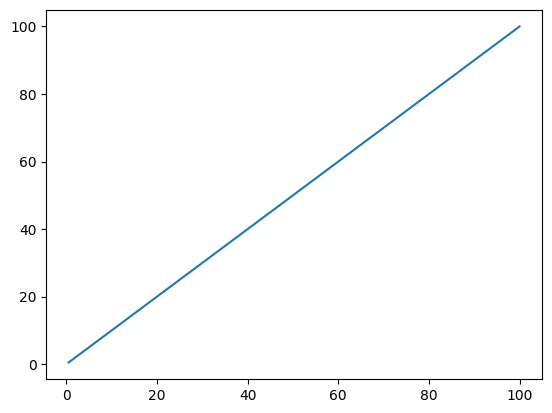

In [ ]:
y = x
plt.plot(y, x)

2.   $y = x^2$



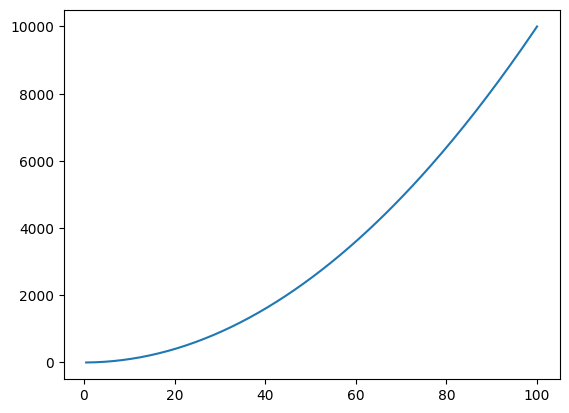

In [ ]:
y = x**2
plt.plot(x, y)

3.   $y = \frac {x^3}{100}$

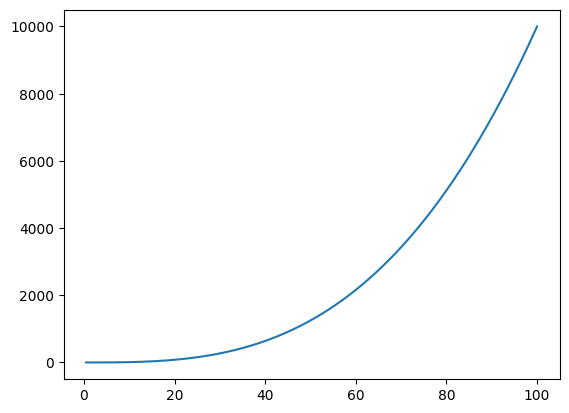

In [ ]:
y = x**3 / 100
plt.plot(x, y)

4.   $y = sin(x)$

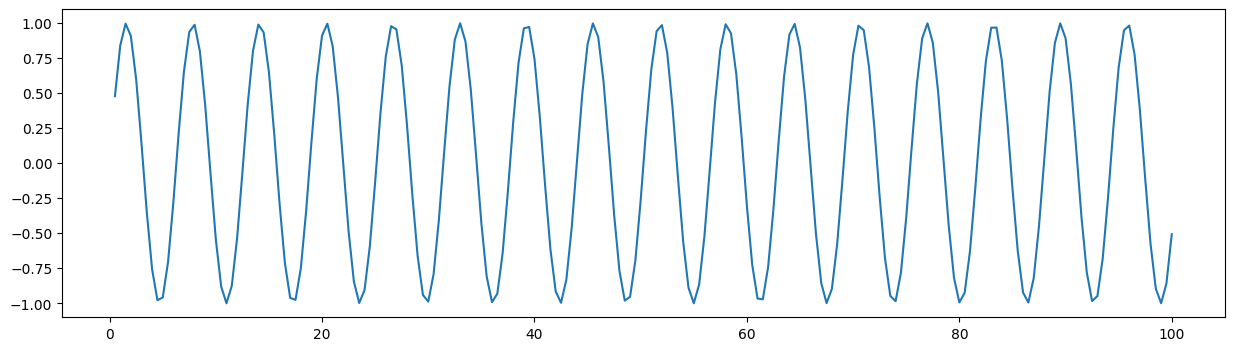

In [ ]:
plt.figure(figsize=(15,4))
y = np.sin(x)
plt.plot(x, y)
plt.show()

5.   $y = \frac {sin(x)}{x}$

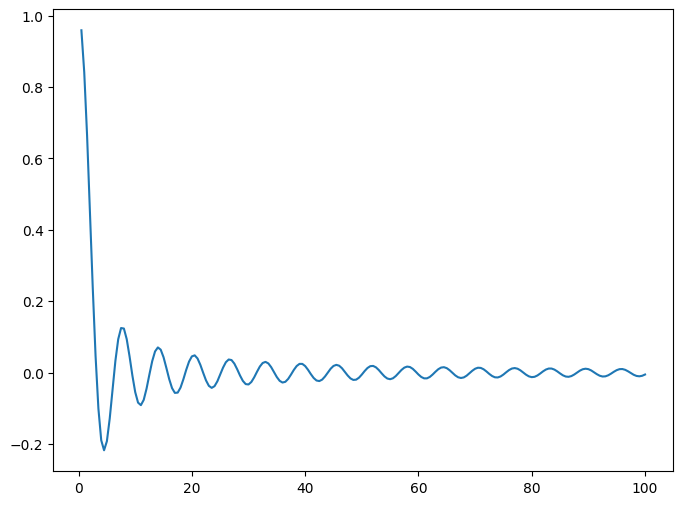

In [ ]:
plt.figure(figsize=(8,6))
y = np.sin(x) / x
plt.plot(x, y)
plt.show()

6.   $y = log(x)$

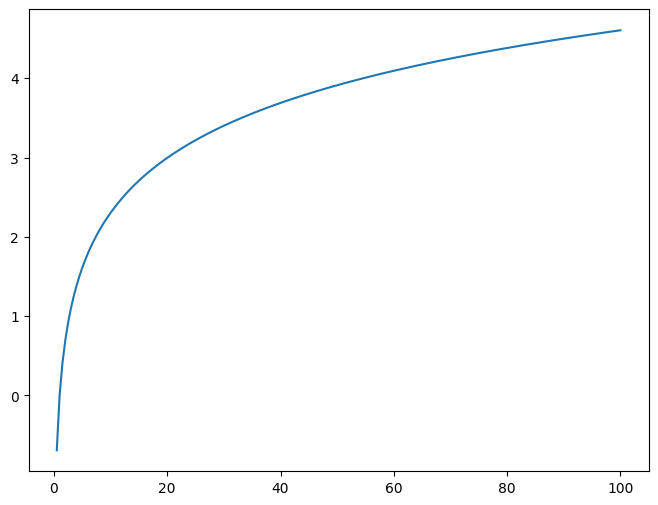

In [ ]:
plt.figure(figsize=(8,6))
y = np.log(x)
plt.plot(x, y)
plt.show()

7.   $y = e^x$

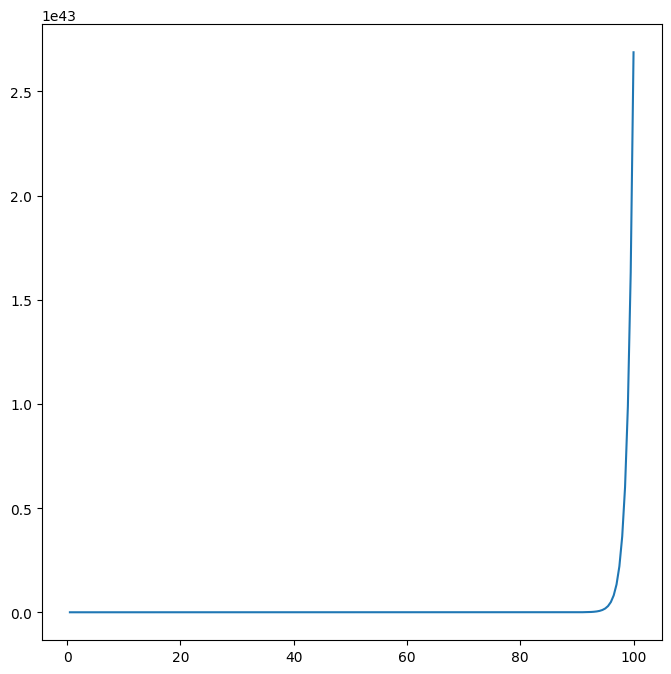

In [ ]:
plt.figure(figsize=(8,8))
y = np.exp(x)
plt.plot(x, y)
plt.show()

#### 10) Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.



In [17]:
mat = np.random.rand(20,5) + 1 # shape
# or
mat = np.random.uniform(1,2,(20, 5)) # low, high and shape
mat

array([[1.80865996, 1.15506533, 1.60802234, 1.36721888, 1.19157975],
       [1.34979778, 1.3923002 , 1.33974235, 1.29956845, 1.19530498],
       [1.65872543, 1.62480915, 1.94940638, 1.0203346 , 1.15570404],
       [1.46038288, 1.62926128, 1.54177874, 1.32284561, 1.53167584],
       [1.36444008, 1.0266244 , 1.02050934, 1.4357475 , 1.27929234],
       [1.96037166, 1.39490887, 1.12009431, 1.08952303, 1.87820134],
       [1.8082666 , 1.73237952, 1.80026197, 1.52726633, 1.84492334],
       [1.49951877, 1.35342849, 1.78623269, 1.86964181, 1.64615436],
       [1.03207554, 1.52223473, 1.1395975 , 1.88671521, 1.79693484],
       [1.68354903, 1.02498326, 1.41277017, 1.31228747, 1.93944086],
       [1.54971204, 1.94501264, 1.10284915, 1.89789   , 1.93953278],
       [1.78655001, 1.21174061, 1.58679443, 1.87007407, 1.09563684],
       [1.38376024, 1.89949521, 1.61752866, 1.32985043, 1.65703511],
       [1.06912486, 1.71347508, 1.84328887, 1.31913058, 1.2987446 ],
       [1.47684635, 1.70656581, 1.

In [18]:
df = pd.DataFrame(mat)
df = df.rename(columns={0: "a", 1: "b", 2: "c", 3: "d", 4: 'e'})
df

,a,b,c,d,e
0,1.808660,1.155065,1.608022,1.367219,1.191580
1,1.349798,1.392300,1.339742,1.299568,1.195305
2,1.658725,1.624809,1.949406,1.020335,1.155704
3,1.460383,1.629261,1.541779,1.322846,1.531676
4,1.364440,1.026624,1.020509,1.435747,1.279292
5,1.960372,1.394909,1.120094,1.089523,1.878201
6,1.808267,1.732380,1.800262,1.527266,1.844923
7,1.499519,1.353428,1.786233,1.869642,1.646154
8,1.032076,1.522235,1.139597,1.886715,1.796935
9,1.683549,1.024983,1.412770,1.312287,1.939441


In [19]:
# for finding column with highest standard deviation
deviations = df.std(0) # list of standard deviations of each column
print(deviations)
idmax = deviations.idxmax() # id of the highest value
print("Column with highest standard deviation:", idmax)

a    0.264199
b    0.276938
c    0.284666
d    0.285496
e    0.298395
dtype: float64
Column with highest standard deviation: e


In [20]:
# for finding row with the lowest mean
means = df.mean(1) # 1 for axis value
print(means)
idmin = means.idxmin()
print("Row with the lowest mean:", idmin)

0     1.426109
1     1.315343
2     1.481796
3     1.497189
4     1.225323
5     1.488620
6     1.742620
7     1.630995
8     1.475512
9     1.474606
10    1.686999
11    1.510159
12    1.577534
13    1.448753
14    1.489203
15    1.453388
16    1.549494
17    1.543228
18    1.443710
19    1.426106
dtype: float64
Row with the lowest mean: 4


#### 11) Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.



In [25]:
sums = df.iloc[:, :5].sum(1)  # accessing the first 5 columns and summing them
df = df.assign(f = sums)
df

,a,b,c,d,e,f
0,1.808660,1.155065,1.608022,1.367219,1.191580,7.130546
1,1.349798,1.392300,1.339742,1.299568,1.195305,6.576714
2,1.658725,1.624809,1.949406,1.020335,1.155704,7.408980
3,1.460383,1.629261,1.541779,1.322846,1.531676,7.485944
4,1.364440,1.026624,1.020509,1.435747,1.279292,6.126614
5,1.960372,1.394909,1.120094,1.089523,1.878201,7.443099
6,1.808267,1.732380,1.800262,1.527266,1.844923,8.713098
7,1.499519,1.353428,1.786233,1.869642,1.646154,8.154976
8,1.032076,1.522235,1.139597,1.886715,1.796935,7.377558
9,1.683549,1.024983,1.412770,1.312287,1.939441,7.373031


In [37]:
# adding column g with a conditional value
df['g'] = ["LT8" if f < 8 else "GT8" for f in df['f']]
print(df)
# for finding number of rows with LT8
num_rows_lt8 = len(df.loc[df['g'] == 'LT8'])
print("Number of rows with g = LT8:", num_rows_lt8)

           a         b         c         d         e         f    g
0   1.808660  1.155065  1.608022  1.367219  1.191580  7.130546  LT8
1   1.349798  1.392300  1.339742  1.299568  1.195305  6.576714  LT8
2   1.658725  1.624809  1.949406  1.020335  1.155704  7.408980  LT8
3   1.460383  1.629261  1.541779  1.322846  1.531676  7.485944  LT8
4   1.364440  1.026624  1.020509  1.435747  1.279292  6.126614  LT8
5   1.960372  1.394909  1.120094  1.089523  1.878201  7.443099  LT8
6   1.808267  1.732380  1.800262  1.527266  1.844923  8.713098  GT8
7   1.499519  1.353428  1.786233  1.869642  1.646154  8.154976  GT8
8   1.032076  1.522235  1.139597  1.886715  1.796935  7.377558  LT8
9   1.683549  1.024983  1.412770  1.312287  1.939441  7.373031  LT8
10  1.549712  1.945013  1.102849  1.897890  1.939533  8.434997  GT8
11  1.786550  1.211741  1.586794  1.870074  1.095637  7.550796  LT8
12  1.383760  1.899495  1.617529  1.329850  1.657035  7.887670  LT8
13  1.069125  1.713475  1.843289  1.319131  1.29

In [41]:
# for finding standard deviation of f where g = LT8 or GT8 respectively
df_lt8 = df[df['g'] == 'LT8']['f']
print(df_lt8)
dev_lt8 = df_lt8.std()
print("Standard dev of 'f' where g=LT8:", dev_lt8)
df_gt8 = df[df['g'] == 'GT8']['f']
print(df_gt8)
dev_lt8 = df_gt8.std()
print("Standard dev of 'f' where g=GT8:", dev_lt8)

0     7.130546
1     6.576714
2     7.408980
3     7.485944
4     6.126614
5     7.443099
8     7.377558
9     7.373031
11    7.550796
12    7.887670
13    7.243764
14    7.446014
15    7.266938
16    7.747468
17    7.716141
18    7.218552
19    7.130530
Name: f, dtype: float64
Standard dev of 'f' where g=LT8: 0.4220116008935627
6     8.713098
7     8.154976
10    8.434997
Name: f, dtype: float64
Standard dev of 'f' where g=GT8: 0.2790613775455823


#### 12) Write a small piece of code to explain broadcasting in numpy.



The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations. Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes. Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. It does this without making needless copies of data and usually leads to efficient algorithm implementations. There are, however, cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.

When operating on two arrays, NumPy compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimension and works its way left. Two dimensions are compatible when

*   they are equal, or
*   one of them is 1.








In [43]:
a = np.array([1.0, 2.0, 3.0])
b = 2.0
res = a * b
print("array a:", a)
print("scalar b:", b)
print("result:", res)

array a: [1. 2. 3.]
scalar b: 2.0
result: [2. 4. 6.]


#### 13) Write a function to compute the `argmin` of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the `np.argmin` function to verify your solution.

In [5]:
arr = np.array([28,52,13,59,23,43,90,34,88,47])

argmin = 0
min = np.inf

for i in range(len(arr)):
  if arr[i] < min:
    min = arr[i]
    argmin = i

print(f"index of minimum element found manually: {argmin}")
print(f"index of minimum element found by np.argmin function: {np.argmin(arr)}")

index of minimum element found manually: 2
index of minimum element found by np.argmin function: 2
